In [1]:
#Load the libraries
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #matplotlib for plotting
from operator import attrgetter
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the data
data = pd.read_csv("loan.csv")
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [3]:
# Checking type of columns, shape, missing value etc.
print(data.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

In [4]:
# Checking shape of data before manipulation
data.shape

(39717, 111)

In [5]:
# Some columns seems to have all NA values
data.columns[data.isna().all()]

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [6]:
# Columns with all NA values cannot possibly contribute in any way in analysis, hence dropping them
data = data.dropna(axis=1, how="all")

In [7]:
# Shape of data after dropping columns with all NA
data.shape

(39717, 57)

In [8]:
# Still a lot of columns, how to find which columns are best suited for analysis
print(data.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

In [9]:
# Some columns seem to have all zeros, find list of columns with mean 0
lst = data.mean() > 0
lst

id                             True
member_id                      True
loan_amnt                      True
funded_amnt                    True
funded_amnt_inv                True
installment                    True
annual_inc                     True
dti                            True
delinq_2yrs                    True
inq_last_6mths                 True
mths_since_last_delinq         True
mths_since_last_record         True
open_acc                       True
pub_rec                        True
revol_bal                      True
total_acc                      True
out_prncp                      True
out_prncp_inv                  True
total_pymnt                    True
total_pymnt_inv                True
total_rec_prncp                True
total_rec_int                  True
total_rec_late_fee             True
recoveries                     True
collection_recovery_fee        True
last_pymnt_amnt                True
collections_12_mths_ex_med    False
policy_code                 

In [10]:
# since all columns have only positive values, drop columns with mean 0
data.drop(labels=lst[lst==False].index.tolist(), inplace=True, axis=1)

In [11]:
#Dropping url column, not needed for EDA, Loan id is available in separate column
data.drop(labels=["url"], inplace=True, axis=1)
data.shape

(39717, 51)

In [12]:
# Checking columns after removing all NA and 0 columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [13]:
# Since there are still 51 cols, Will clean and manipulate data for rest of the cols as and when needed
# Cheking loan_status column
data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [14]:
# Extracting duration of loan payment in months from issue_d(date when loan was funded) and last_pymnt_d(last repayment received date)
data["paid_months"]=(pd.to_datetime(data.last_pymnt_d, format="%b-%y") - 
                     pd.to_datetime(data.issue_d, format="%b-%y"))/np.timedelta64(1, 'M')

In [15]:
# paid_months values
data.paid_months.value_counts()

36.008953    5745
37.027454    2929
36.994599    2158
24.016920     578
34.004805     517
             ... 
68.962402       1
66.958254       1
64.034169       1
66.038317       1
0.952792        1
Name: paid_months, Length: 263, dtype: int64

In [16]:
# term values
data.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [17]:
# Modifying term to int
data.term = data.term.apply(lambda x: int((x[0:3]).strip()))

In [18]:
data.term.value_counts()

36    29096
60    10621
Name: term, dtype: int64

Segregating dataset for analsysis. selection criteria:
1. Loan status in Fully Paid, Charged Off
2. Loan status Current and paid for more than 90% of total term length, considering these to be nearer to fully-paid

In [19]:
data_CF = data[data.loan_status.isin(["Fully Paid", "Charged Off"]) | ((data.paid_months/data.term)*100 > 90)]

In [20]:
data_CF.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current          761
Name: loan_status, dtype: int64

In [21]:
# Considering current loans with more than 90% of term already paid as Fully-Paid
data_CF.loan_status = data_CF.loan_status.apply(lambda x: "Fully Paid" if x=="Current" else x)

In [22]:
data_CF.loan_status.value_counts()

Fully Paid     33711
Charged Off     5627
Name: loan_status, dtype: int64

# Evaluating credit risk based on three factors - Character, Capacity and Conditions. Each of these factors influenced by multiple columns in dataset.
1. Character - length of employments, pub_rec_bankruptcies, emp_title, verification_status
2. Capacity - DTI, Annual income, homeownership
3. Conditions - Interest rate, funded amount, term length, Purpose

# Analyzing Character

In [23]:
## Checking Employment length column
# Data looks good, no cleanup needed
data_CF.emp_length.value_counts()

10+ years    8756
< 1 year     4560
2 years      4354
3 years      4066
4 years      3398
5 years      3258
1 year       3214
6 years      2208
7 years      1749
8 years      1462
9 years      1251
Name: emp_length, dtype: int64

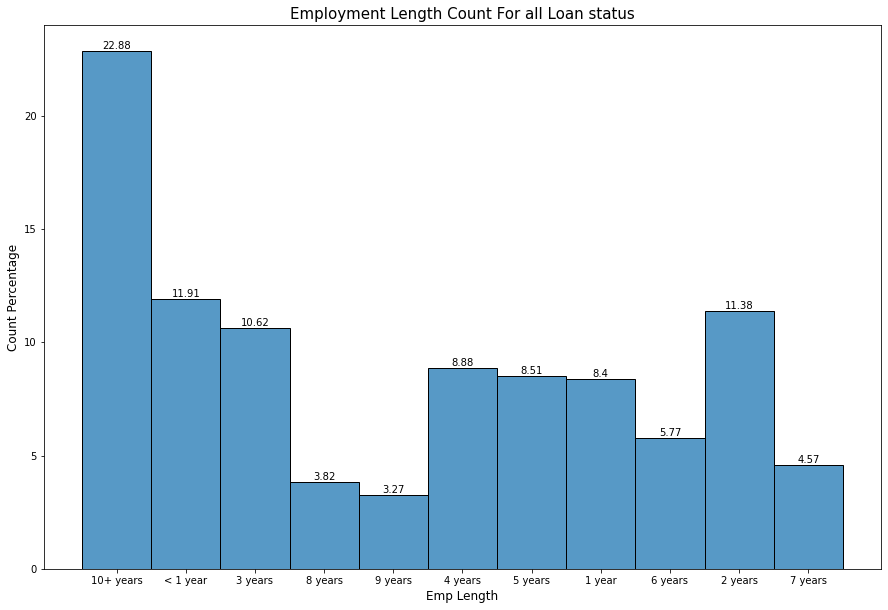

In [24]:
# Univariate analysis on emp_length across all loan status
fig, ax = plt.subplots(figsize=(15,10))
g = sns.histplot(data=data_CF, x="emp_length", bins=11, stat="percent")
labels = [str(np.round(v, 2)) if v else '' for v in g.containers[0].datavalues]
g.bar_label(g.containers[0], labels=labels)
g.set_title("Employment Length Count For all Loan status", fontsize=15)
g.set_ylabel("Count Percentage", fontsize=12)
g.set_xlabel("Emp Length", fontsize=12)
plt.show()

In [25]:
# Creating new col to bin emp_length into 3 buckets - <5 years, 5 to 10 years, 10+ years
data_CF["emp_length_bucket"] = data_CF.emp_length.apply(lambda x : str(x)[0:-6])

In [26]:
data_CF.emp_length_bucket = data_CF.emp_length_bucket.apply(lambda x: 0 if ((x=="< ") | (x=="")) else x)

In [27]:
data_CF.emp_length_bucket = data_CF.emp_length_bucket.apply(lambda x: (x[0:2]).strip() if x=="10+" else x)

In [28]:
data_CF.emp_length_bucket = data_CF.emp_length_bucket.astype("int")

In [29]:
# Binning based on emp length - <5 years, 5 to 10 years, 10+ years
data_CF.emp_length_bucket = data_CF.emp_length_bucket.apply(lambda x: "<5 years" if x<5 else "5-10 years" if((x>=5) & (x<10)) else "10+ years")

In [30]:
# Checking new column data, looks good
data_CF.emp_length_bucket.value_counts()

<5 years      20654
5-10 years     9928
10+ years      8756
Name: emp_length_bucket, dtype: int64

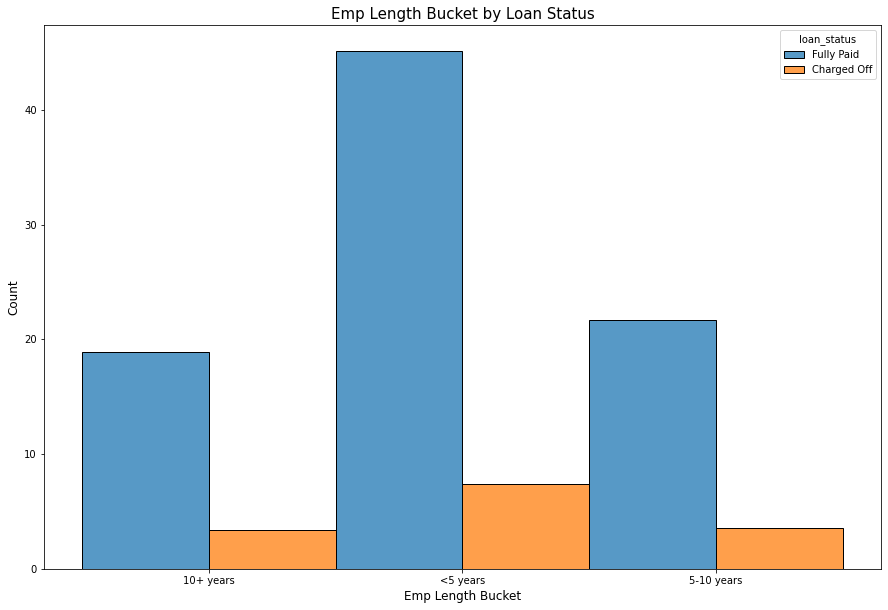

In [31]:
# bi-variate analysis on emp_length_bucket against loan_status
fig, ax = plt.subplots(figsize=(15,10))
g = sns.histplot(data=data_CF, x="emp_length_bucket", hue="loan_status", multiple="dodge", stat="percent")
g.set_title("Emp Length Bucket by Loan Status", fontsize=15)
g.set_ylabel("Count", fontsize=12)
g.set_xlabel("Emp Length Bucket", fontsize=12)
plt.show()

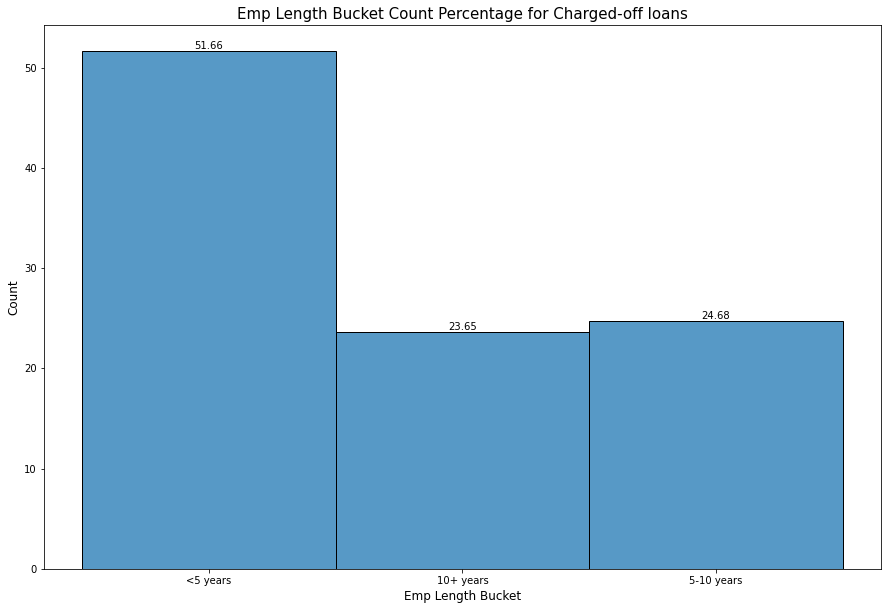

In [32]:
# segmented univariate analysis on emp length bucket for Charged-off loans
fig, ax = plt.subplots(figsize=(15,10))
g = sns.histplot(data=data_CF[data_CF.loan_status=="Charged Off"], x="emp_length_bucket", stat="percent")
labels = [str(np.round(v, 2)) if v else '' for v in g.containers[0].datavalues]
g.bar_label(g.containers[0], labels=labels)
g.set_title("Emp Length Bucket Count Percentage for Charged-off loans", fontsize=15)
g.set_ylabel("Count", fontsize=12)
g.set_xlabel("Emp Length Bucket", fontsize=12)
plt.show()

# Observation - Around 52% of charged-off loan customers have <5 years employment length

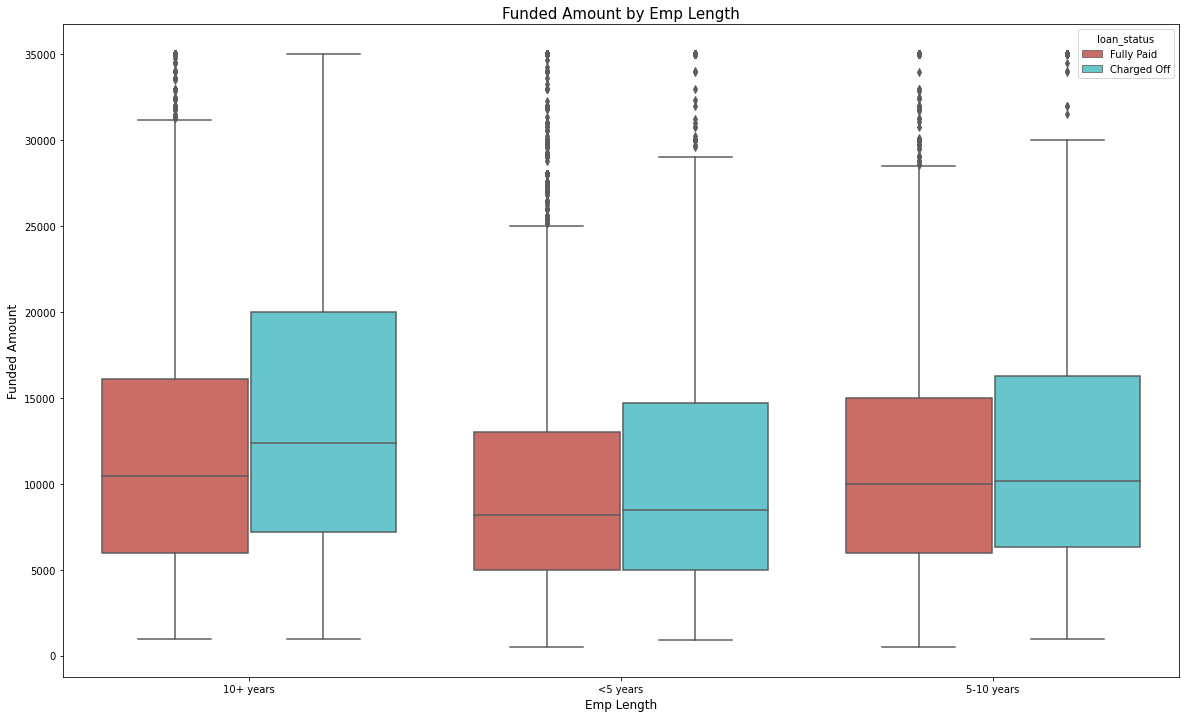

In [33]:
# Checking Funded amount distribution across Emp length bucket
fig, ax = plt.subplots(figsize=(20,12))
g2 = sns.boxplot(x="emp_length_bucket", y="funded_amnt",data=data_CF, 
              palette="hls", hue="loan_status")
g2.set_title("Funded Amount by Emp Length", fontsize=15)
g2.set_ylabel("Funded Amount", fontsize=12)
g2.set_xlabel("Emp Length", fontsize=12)
plt.show()

# Observation - Median and 75th Percentile of Funded amount for Charged-off loans with 10+ years of employment is higher than others


In [34]:
# Aggregating median funded amount and interest rate for loan and emp length bucket
data_CF.groupby(["loan_status", "emp_length_bucket"])[["funded_amnt", "int_rate"]].agg(["median"])

funded_amnt
                                   median
loan_status emp_length_bucket            
Charged Off 10+ years             12375.0
            5-10 years            10175.0
            <5 years               8500.0
Fully Paid  10+ years             10450.0
            5-10 years            10000.0
            <5 years               8175.0

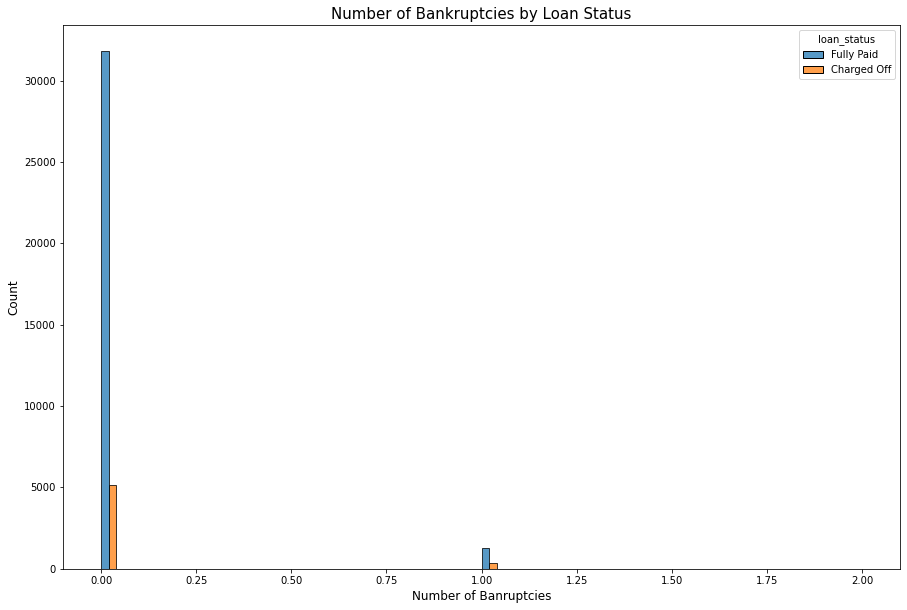

In [35]:
# bi-variate analysis on pub_rec_bankruptcies against loan status
fig, ax = plt.subplots(figsize=(15,10))
g = sns.histplot(data=data_CF, x="pub_rec_bankruptcies", bins=50, hue="loan_status", multiple="dodge")
g.set_title("Number of Bankruptcies by Loan Status", fontsize=15)
g.set_ylabel("Count", fontsize=12)
g.set_xlabel("Number of Banruptcies", fontsize=12)
plt.show()

# Most have no bankruptcies, a very small numbers of fully paid and Charged-off customers have 1 bankruptcy

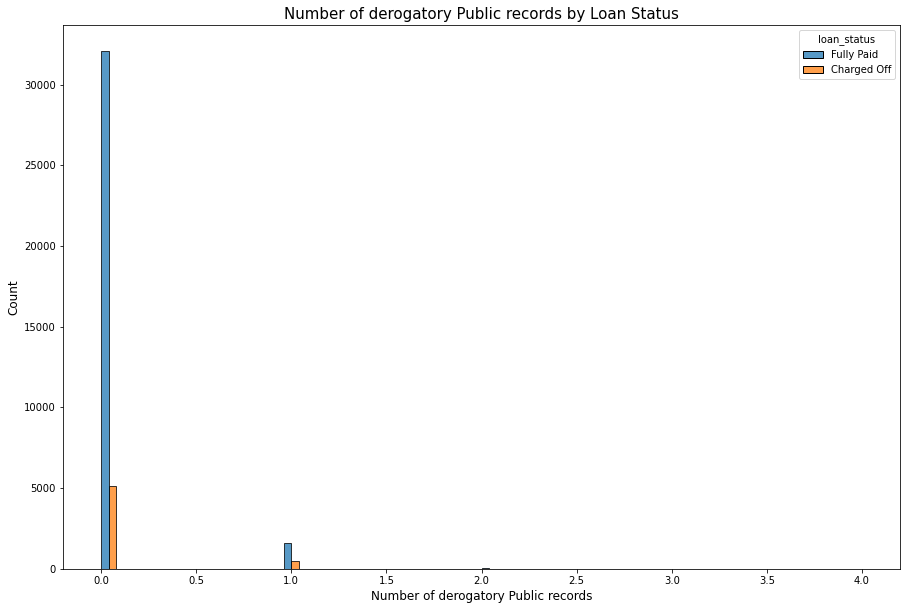

In [36]:
# Bi-variate analysis on pub_rec against loan_status
fig, ax = plt.subplots(figsize=(15,10))
g = sns.histplot(data=data_CF, x="pub_rec", bins=50, hue="loan_status", multiple="dodge")
g.set_title("Number of derogatory Public records by Loan Status", fontsize=15)
g.set_ylabel("Count", fontsize=12)
g.set_xlabel("Number of derogatory Public records", fontsize=12)
plt.show()

In [37]:
# checking data for emp_title column
data_CF.groupby(data_CF.emp_title).agg("count")

id  member_id  loan_amnt  funded_amnt  \
emp_title                                                                  
  old palm inc                      1          1          1            1   
 Brocade Communications             1          1          1            1   
 CenturyLink                        1          1          1            1   
 Department of Homeland Security    1          1          1            1   
 Down To Earth Distributors, Inc.   1          1          1            1   
...                                ..        ...        ...          ...   
zashko inc.                         1          1          1            1   
zeno office solutions               1          1          1            1   
zion lutheran school                1          1          1            1   
zoll medical corp                   1          1          1            1   
zozaya officiating                  1          1          1            1   

                                   funded_amnt_inv  term  int_rate  \
emp_title                                                            
  old palm inc                                   1     1         1   
 Brocade Communications                          1     1         1   
 CenturyLink                                     1     1         1   
 Department of Homeland Security                 1     1         1   
 Down To Earth Distributors, Inc.                1     1         1   
...                                            ...   ...       ...   
zashko inc.                                      1     1         1   
zeno office solutions                            1     1         1   
zion lutheran school                             1     1         1   
zoll medical corp                                1     1         1   
zozaya officiating                               1     1         1   

                                   installment  grade  sub_grade  ...  \
emp_title                                                         ...   
  old palm inc                               1      1          1  ...   
 Brocade Communications                      1      1          1  ...   
 CenturyLink                                 1      1          1  ...   
 Department of Homeland Security             1      1          1  ...   
 Down To Earth Distributors, Inc.            1      1          1  ...   
...                                        ...    ...        ...  ...   
zashko inc.                                  1      1          1  ...   
zeno office solutions                        1      1          1  ...   
zion lutheran school                         1      1          1  ...   
zoll medical corp                            1      1          1  ...   
zozaya officiating                           1      1          1  ...   

                                   collection_recovery_fee  last_pymnt_d  \
emp_title                                                                  
  old palm inc                                           1             1   
 Brocade Communications                                  1             1   
 CenturyLink                                             1             1   
 Department of Homeland Security                         1             1   
 Down To Earth Distributors, Inc.                        1             1   
...                                                    ...           ...   
zashko inc.                                              1             1   
zeno office solutions                                    1             1   
zion lutheran school                                     1             1   
zoll medical corp                                        1             1   
zozaya officiating                                       1             1   

                                   last_pymnt_amnt  next_pymnt_d  \
emp_title                                                          
  old palm inc                                   1          

In [38]:
# Checking emp_title (Employer name).  
# Since there are a lot of different values, segmenting on employemer names with more than 20 value counts
emplst = data_CF.emp_title.value_counts() >20
emplst = emplst[emplst==True].index.tolist()

In [39]:
len(emplst)

52

In [40]:
# taking sub-set of the data for employers appearing > 20 times
data_CF_emptitle = data_CF[(data_CF.emp_title.isin(emplst))]
data_CF_emptitle.shape

(1961, 53)

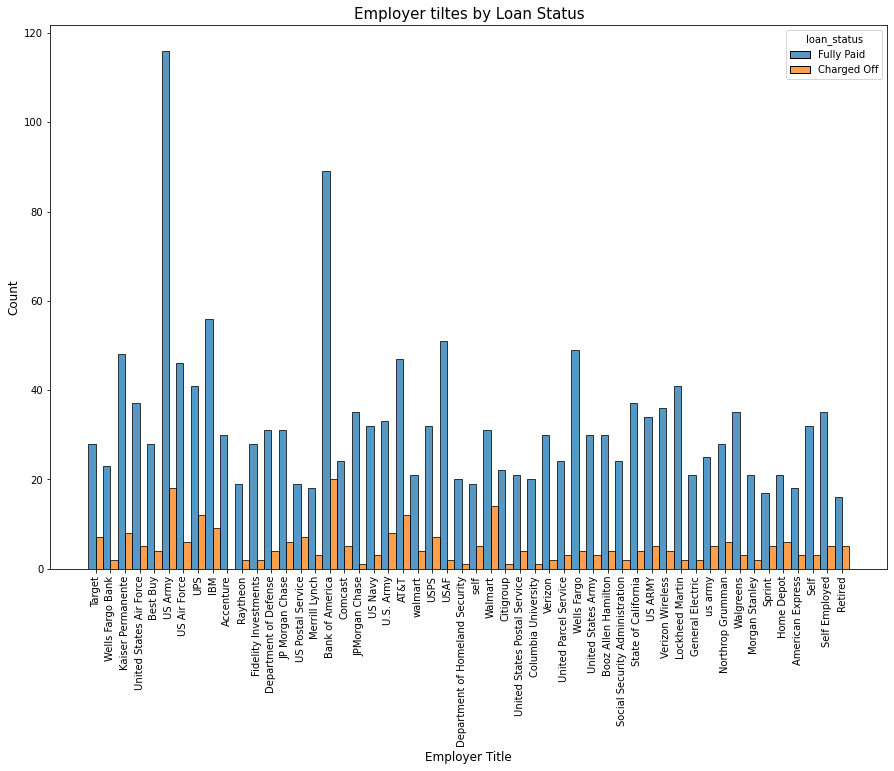

In [41]:
# Bi-variate segmented analysis on most frequent employers against loan status
fig, ax = plt.subplots(figsize=(15,10))
g = sns.histplot(data=data_CF_emptitle, x="emp_title", bins=50, hue="loan_status", multiple="dodge")
g.set_title("Employer tiltes by Loan Status", fontsize=15)
g.set_ylabel("Count", fontsize=12)
g.set_xlabel("Employer Title", fontsize=12)
plt.xticks(rotation=90)
plt.show()

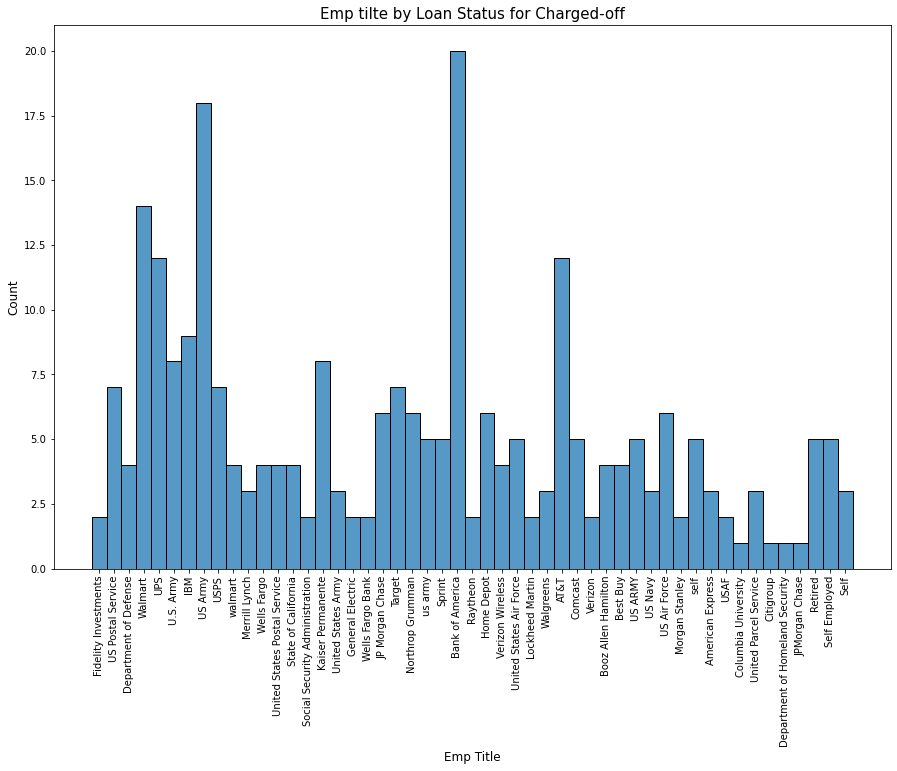

In [42]:
# segmented univariate analysis on employer title for charged-off loans
fig, ax = plt.subplots(figsize=(15,10))
g = sns.histplot(data=data_CF_emptitle[data_CF_emptitle.loan_status=="Charged Off"], x="emp_title", bins=50)
g.set_title("Emp tilte by Loan Status for Charged-off", fontsize=15)
g.set_ylabel("Count", fontsize=12)
g.set_xlabel("Emp Title", fontsize=12)
plt.xticks(rotation=90)
plt.show()

Top 3 Employer titles for Charged-off customers are Bank of America, US Army and Walmart

In [43]:
# Checking last payment year fpr these loans, extracting year from lasy_pymnt_d
data_CF_emptitle["last_pymnt_year"] = data_CF_emptitle.last_pymnt_d.apply(lambda x: pd.to_datetime(x, format="%b-%y").year)

In [44]:
data_CF_emptitle.last_pymnt_year = data_CF_emptitle.last_pymnt_year.astype("str")

In [45]:
# analysing loan data for top 3 employers
d = data_CF_emptitle[(data_CF_emptitle.loan_status=="Charged Off") & (data_CF_emptitle.emp_title.isin(["Bank of America", "US Army", "Walmart"]))]

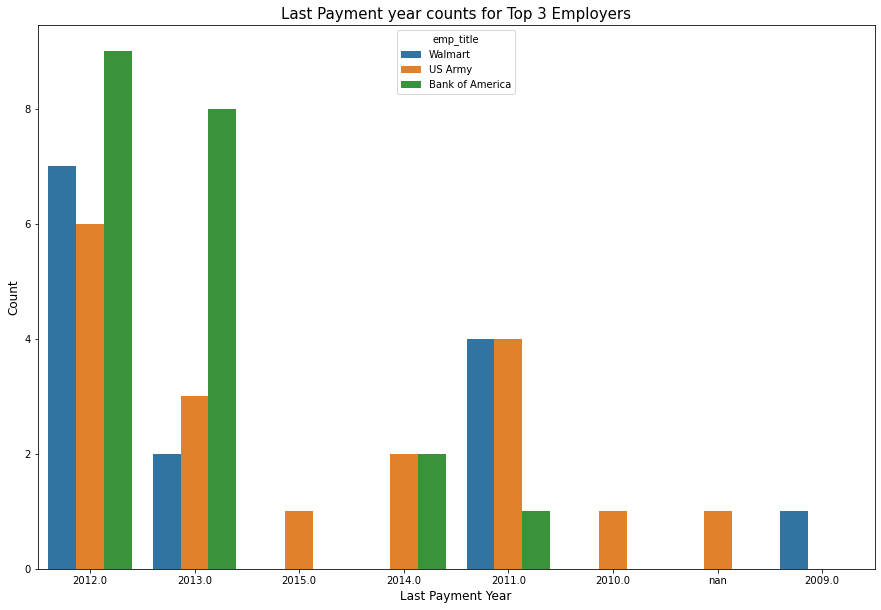

In [46]:
# Trying to find which year most of the defaulted loans paid last installment for dataset segmented on top 3 employers
fig, ax = plt.subplots(figsize=(15,10))
g = sns.countplot(data=d, x="last_pymnt_year", hue="emp_title")
g.set_title("Last Payment year counts for Top 3 Employers", fontsize=15)
g.set_ylabel("Count", fontsize=12)
g.set_xlabel("Last Payment Year", fontsize=12)
plt.show()

# Observation - Among top 3 employers, number of loans that stopped paying is higher for Bank of America in 2012 and 2013. As per news articles, BOA had major job cuts during 2011-2013, which may have resulted in this
https://money.cnn.com/2011/09/12/news/companies/bank_of_america_job_cuts/index.htm 
<br> https://www.forbes.com/sites/halahtouryalai/2012/09/20/why-bank-of-americas-16000-job-cuts-are-necessary/?sh=737129712d8d

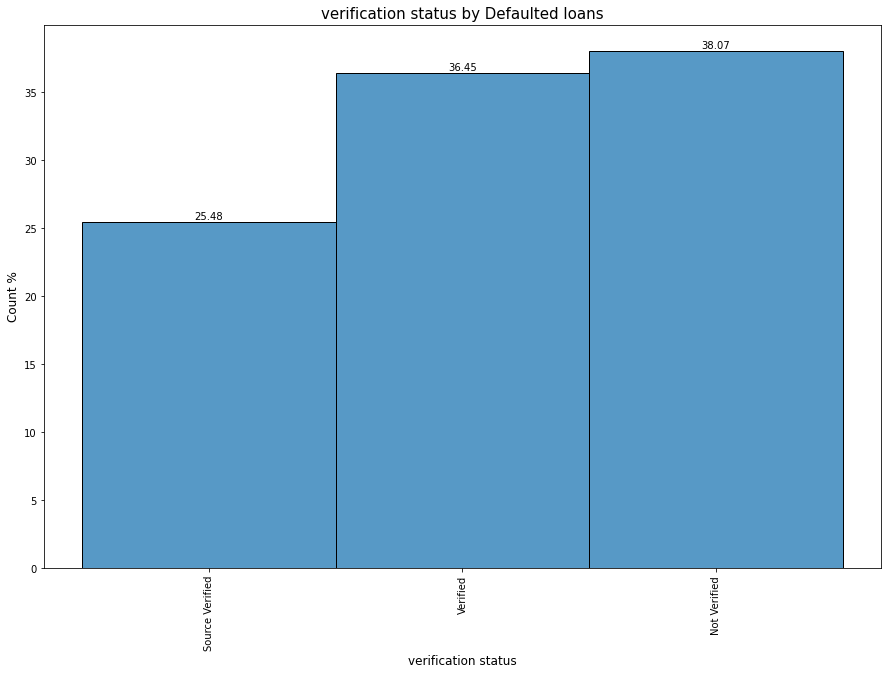

In [47]:
# segmented Uni-variate analysis on verification_status for defaulted loans
fig, ax = plt.subplots(figsize=(15,10))
g = sns.histplot(data=data_CF[data_CF.loan_status=="Charged Off"], x="verification_status", bins=50, stat="percent")
labels = [str(np.round(v, 2)) if v else '' for v in g.containers[0].datavalues]
g.bar_label(g.containers[0], labels=labels)
g.set_title("verification status by Defaulted loans", fontsize=15)
g.set_ylabel("Count %", fontsize=12)
g.set_xlabel("verification status", fontsize=12)
plt.xticks(rotation=90)
plt.show()

# Observation - For 38% of defaulted customers, employment/source of income was not verified

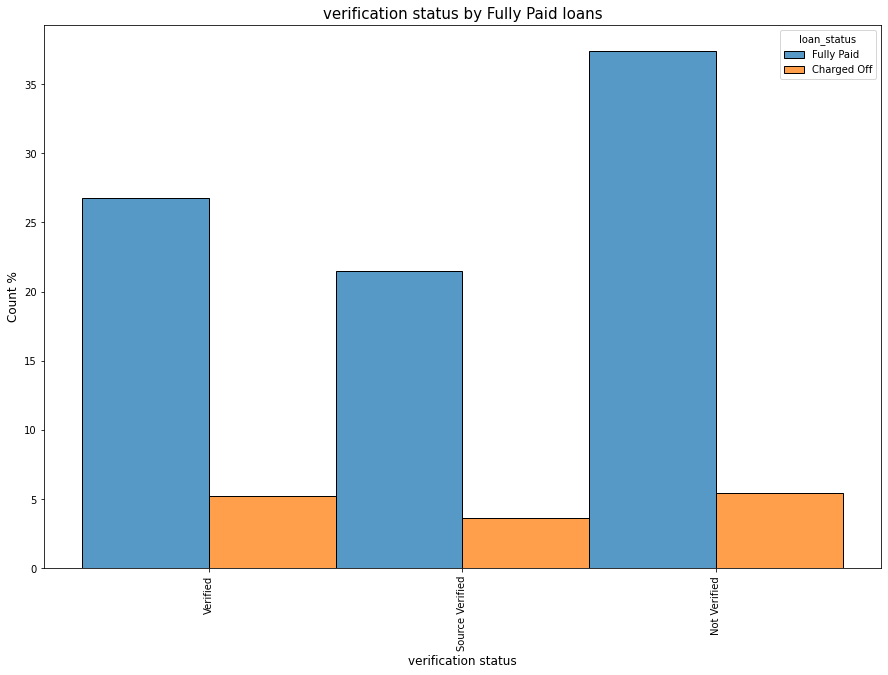

In [48]:
# Uni-variate analysis on verification_status for all loans
fig, ax = plt.subplots(figsize=(15,10))
g = sns.histplot(data=data_CF, x="verification_status", bins=50, stat="percent", hue="loan_status", multiple="dodge")
g.set_title("verification status by Fully Paid loans", fontsize=15)
g.set_ylabel("Count %", fontsize=12)
g.set_xlabel("verification status", fontsize=12)
plt.xticks(rotation=90)
plt.show()

# Analyzing Capacity

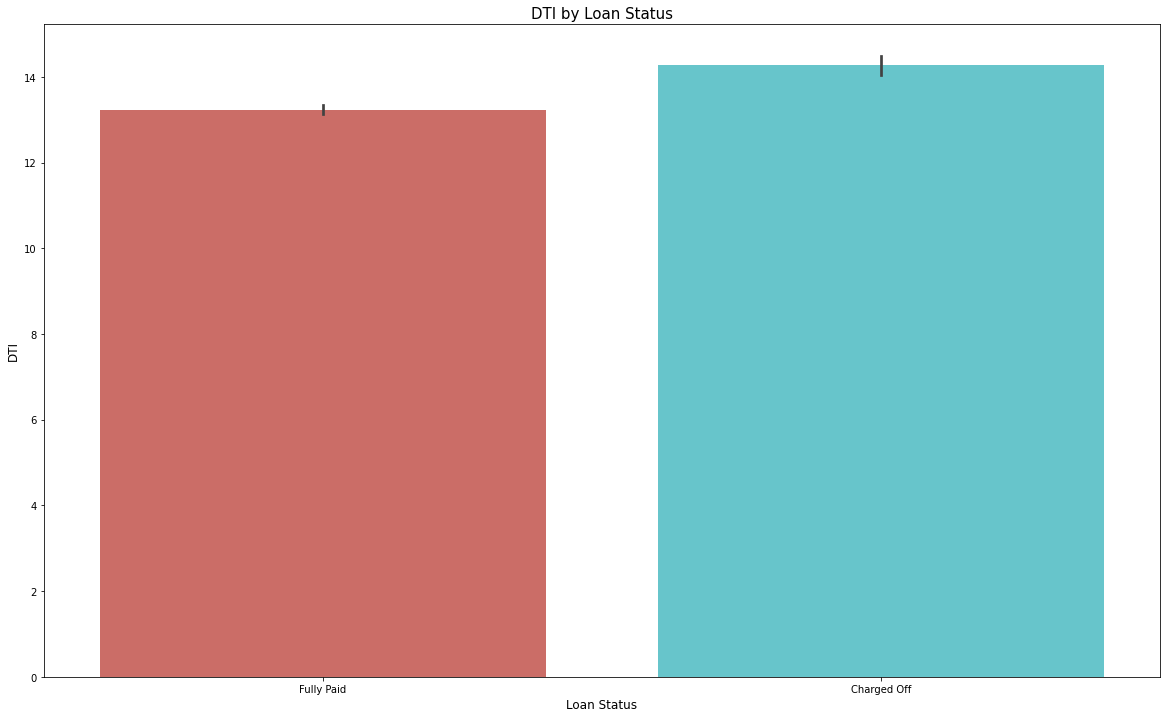

In [49]:
# analyzing DTI by Loan status
from numpy import mean
from numpy import median

fig, ax = plt.subplots(figsize=(20,12))
g2 = sns.barplot(x="loan_status", y="dti",data=data_CF, palette="hls", estimator=median)
g2.set_title("DTI by Loan Status", fontsize=15)
g2.set_ylabel("DTI", fontsize=12)
g2.set_xlabel("Loan Status", fontsize=12)
plt.show()


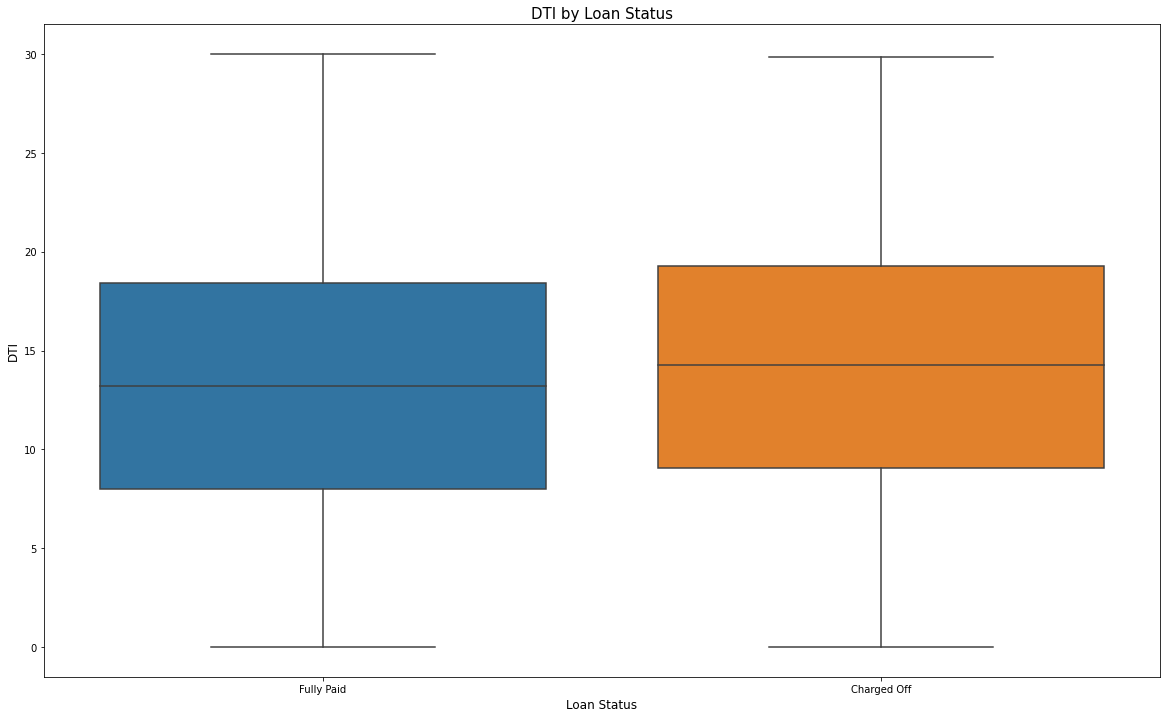

In [50]:
fig, ax = plt.subplots(figsize=(20,12))
plt.ticklabel_format(style='plain')
g2 = sns.boxplot(x="loan_status", y="dti",data=data_CF)
g2.set_title("DTI by Loan Status", fontsize=15)
g2.set_ylabel("DTI", fontsize=12)
g2.set_xlabel("Loan Status", fontsize=12)
plt.show()

In [51]:
data_CF.groupby(["loan_status"])[["dti"]].agg(["median"])

dti
            median
loan_status       
Charged Off  14.29
Fully Paid   13.23

# Observation - Median DTI for Defaulted loans is 8% higher than Fully-paid loans

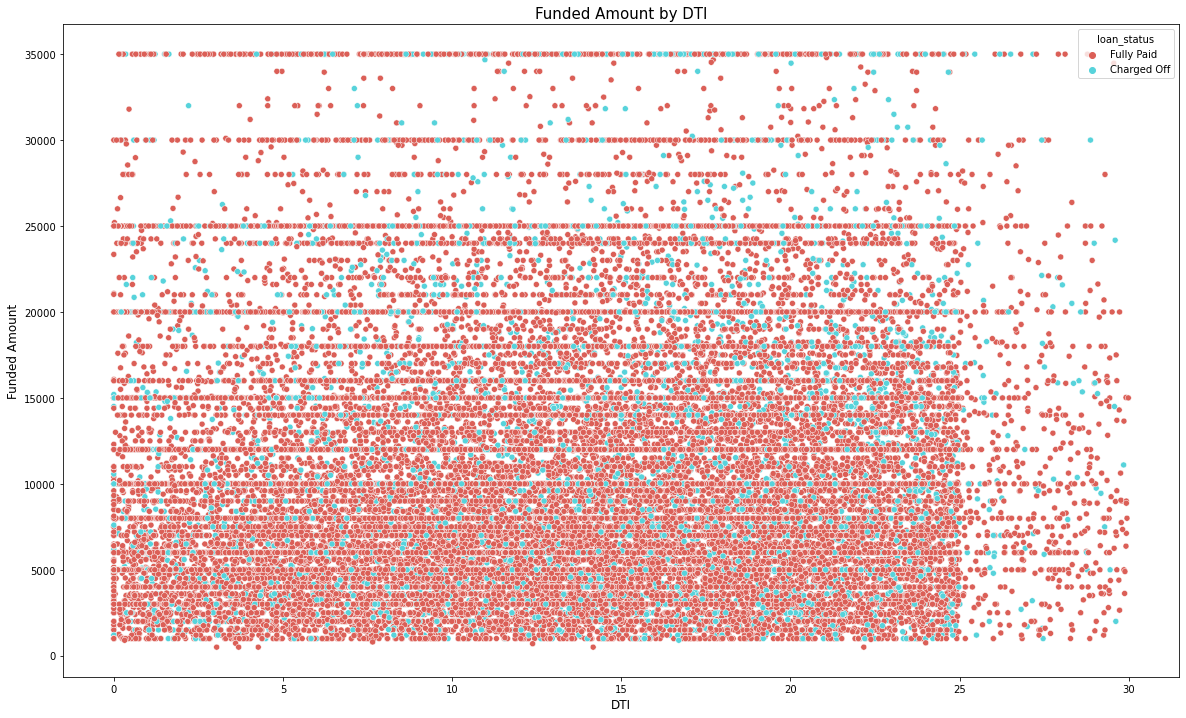

In [52]:
# Funded amount by DTI
fig, ax = plt.subplots(figsize=(20,12))
g2 = sns.scatterplot(x="dti", y="funded_amnt",data=data_CF, palette="hls", hue="loan_status")
g2.set_title("Funded Amount by DTI", fontsize=15)
g2.set_ylabel("Funded Amount", fontsize=12)
g2.set_xlabel("DTI", fontsize=12)
plt.show()

Data is sparsed for DTI >25 and funded amount >25,000. A Debt-Income ratio of 21% - 35% is considered a very good ratio, majority customers are well within that range.

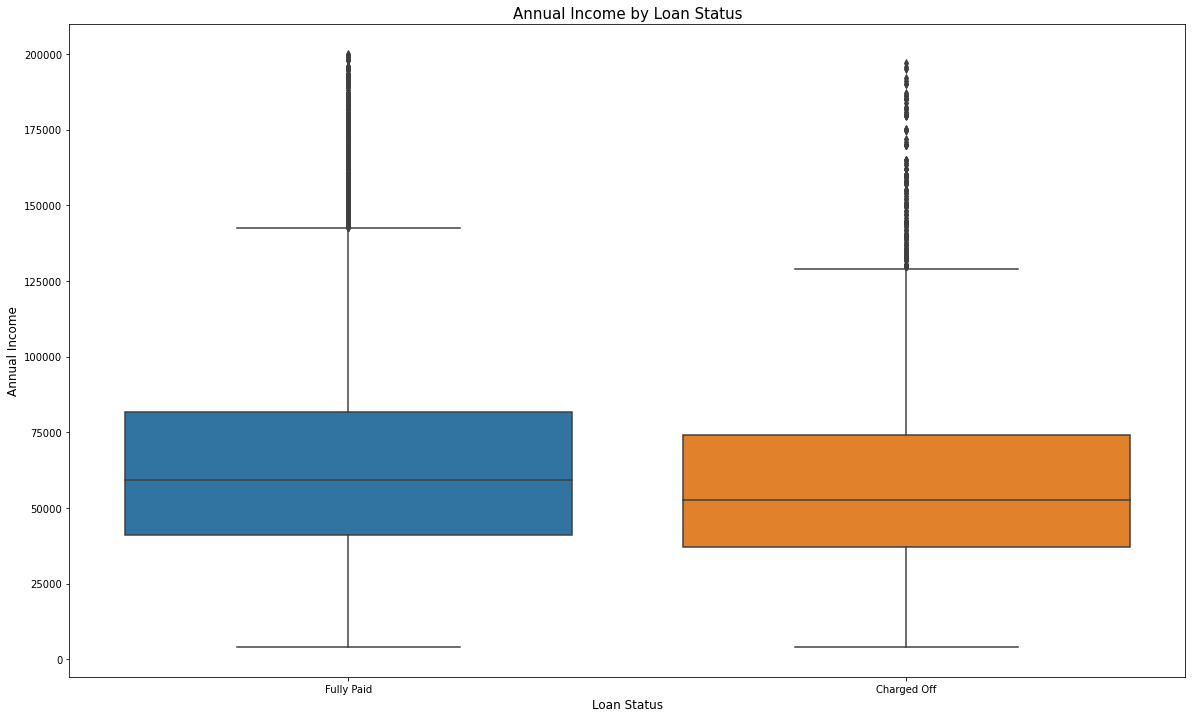

In [53]:
# Bi-variate analsis on Annual Income and Loan status, consdiering annual_inc<200000, since there are lot of outliers
fig, ax = plt.subplots(figsize=(20,12))
plt.ticklabel_format(style='plain')
g2 = sns.boxplot(x="loan_status", y="annual_inc",data=data_CF[(data_CF.annual_inc<200000)])
g2.set_title("Annual Income by Loan Status", fontsize=15)
g2.set_ylabel("Annual Income", fontsize=12)
g2.set_xlabel("Loan Status", fontsize=12)
plt.show()

# Observation: Median annual income is lower for Charged-off loans

In [54]:
# Creating new col annual_inc_bucket, segmenting on annual income: low <40K, mid 40k-75K, high >=75K
data_CF["annual_inc_bucket"] = data_CF.annual_inc.apply(lambda x: "low" if x<40000 else "mid" if (x>=40000) & (x<75000) else "high")

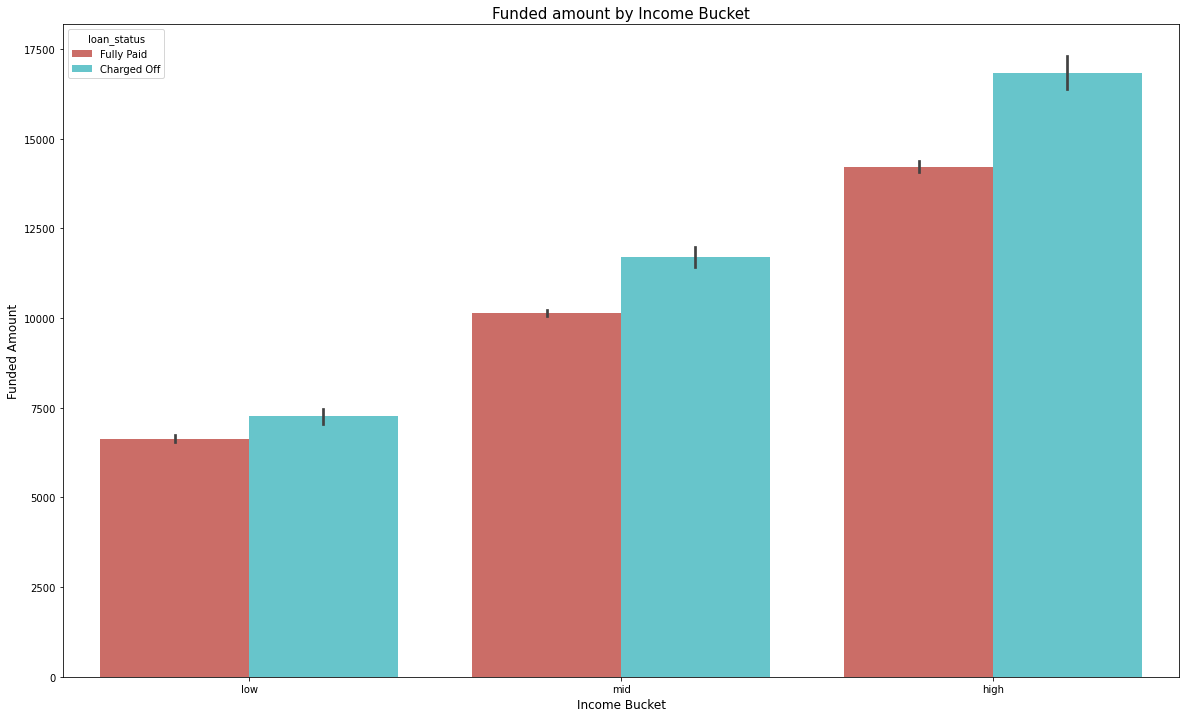

In [55]:
# multi-variate analysis on Funded amount by income bucket against loan status
fig, ax = plt.subplots(figsize=(20,12))
g2 = sns.barplot(x="annual_inc_bucket", y="funded_amnt",data=data_CF, palette="hls", estimator=mean, hue="loan_status")
g2.set_title("Funded amount by Income Bucket", fontsize=15)
g2.set_ylabel("Funded Amount", fontsize=12)
g2.set_xlabel("Income Bucket", fontsize=12)
plt.show()

# Observation - Funded amount for Charged-off loan is higher than that of Fully paid loans across different income groups. Especially for High income group, charged-off loans have considerable higher funded amount

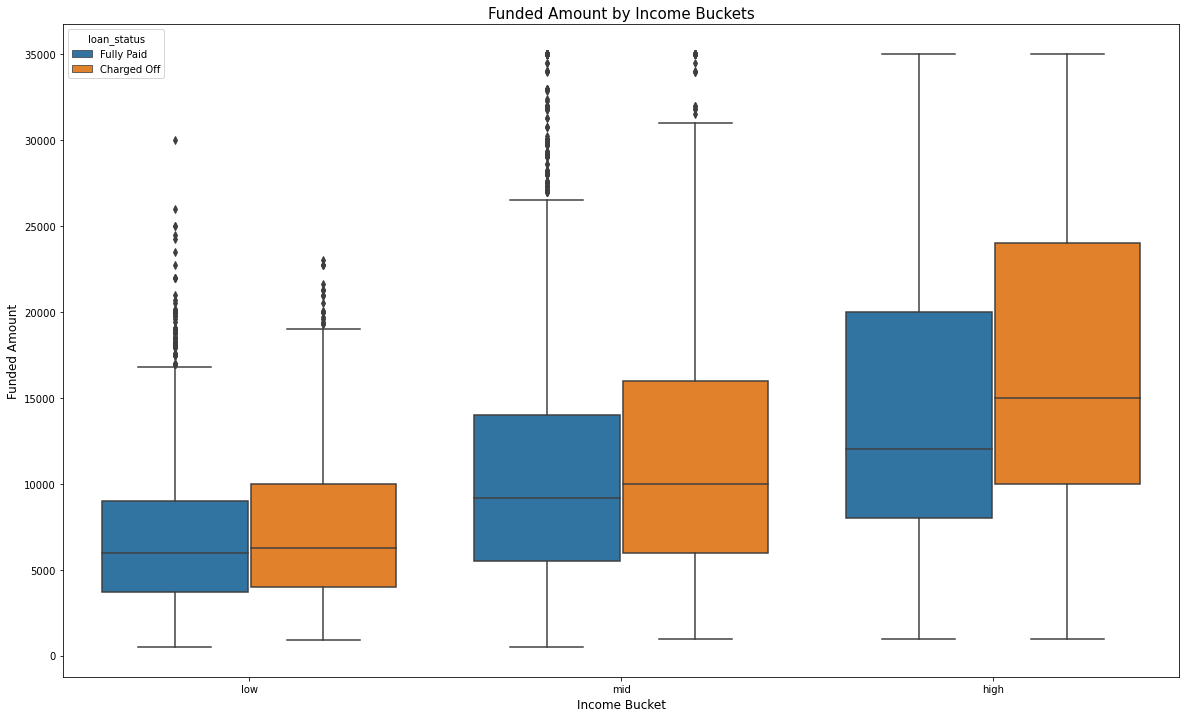

In [56]:
# Box-plot of Funded amount by income bucket
fig, ax = plt.subplots(figsize=(20,12))
plt.ticklabel_format(style='plain')
g2 = sns.boxplot(y="funded_amnt", x="annual_inc_bucket",data=data_CF[(data_CF.annual_inc<200000)], hue="loan_status")
g2.set_title("Funded Amount by Income Buckets", fontsize=15)
g2.set_ylabel("Funded Amount", fontsize=12)
g2.set_xlabel("Income Bucket", fontsize=12)
plt.show()

In [57]:
# Modifying int_rate to float
data_CF.int_rate = data_CF.int_rate.apply(lambda x: float(x[:-1]))

In [58]:
data_CF.int_rate.describe()

count    39338.000000
mean        11.986386
std          3.708619
min          5.420000
25%          9.010000
50%         11.830000
75%         14.460000
max         24.590000
Name: int_rate, dtype: float64

In [59]:
# Aggregrating median funded amount on loan status, employment lengh bucket and income bucket
data_CF.groupby(["loan_status","emp_length_bucket", "annual_inc_bucket"])[["funded_amnt"]].agg(["median"])

funded_amnt
                                                     median
loan_status emp_length_bucket annual_inc_bucket            
Charged Off 10+ years         high                  17425.0
                              low                    8000.0
                              mid                   12000.0
            5-10 years        high                  15000.0
                              low                    7750.0
                              mid                   10000.0
            <5 years          high                  15000.0
                              low                    6000.0
                              mid                   10000.0
Fully Paid  10+ years         high                  13750.0
                              low                    6600.0
                              mid                   10000.0
            5-10 years        high                  12800.0
                              low                    6200.0
                              mid                    9600.0
            <5 years          high                  12000.0
                              low                    5500.0
                              mid                    9000.0

In [60]:
# Aggregrating on multiple columns
data_CF.groupby(["loan_status", "annual_inc_bucket", "home_ownership"])[["funded_amnt", "int_rate", "installment", "dti"]].agg(["median"])

funded_amnt int_rate installment  \
                                                  median   median      median   
loan_status annual_inc_bucket home_ownership                                    
Charged Off high              MORTGAGE           15350.0   14.270     454.450   
                              OTHER              17925.0   13.740     589.655   
                              OWN                18000.0   15.270     491.300   
                              RENT               15000.0   14.650     440.800   
            low               MORTGAGE            6975.0   12.230     198.960   
                              OTHER              10000.0   12.530     282.050   
                              OWN                 6000.0   12.785     172.805   
                              RENT                6037.5   13.160     190.730   
            mid               MORTGAGE           12000.0   13.490     315.630   
                              OTHER              15000.0   11.890     481.420   
                              OWN                10000.0   13.530     302.205   
                              RENT               10000.0   13.980     282.250   
Fully Paid  high              MORTGAGE           13000.0   11.490     375.380   
                              NONE                3400.0    9.170     108.530   
                              OTHER               9500.0   11.735     316.450   
                              OWN                12000.0   11.830     354.650   
                              RENT               12000.0   12.230     372.450   
            low               MORTGAGE            6000.0   10.590     189.380   
                              NONE               10000.0    7.750     312.220   
                              OTHER               6500.0   11.830     208.620   
                              OWN                 6000.0   10.990     178.410   
                              RENT                5600.0   11.490     174.020   
            mid               MORTGAGE            9600.0   10.990     273.760   
                              OTHER               9000.0   11.830     288.850   
                              OWN                 9500.0   11.140     274.720   
                              RENT                9000.0   11.860     273.920   

                                                 dti  
                                              median  
loan_status annual_inc_bucket home_ownership          
Charged Off high              MORTGAGE        13.520  
                              OTHER            8.060  
                              OWN             11.890  
                              RENT            12.730  
            low               MORTGAGE        14.445  
                              OTHER           17.930  
                              OWN             15.480  
                              RENT            14.140  
            mid               MORTGAGE        15.265  
                              OTHER           12.190  
                              OWN             14.325  
                              RENT            14.800  
Fully Paid  high              MORTGAGE        12.145  
                              NONE            15.000  
                              OTHER            8.955  
                              OWN             11.145  
                              RENT            11.420  
            low               MORTGAGE        13.250  
                              NONE             5.240  
                              OTHER           11.700  
                              OWN             13.600  
                              RENT            14.160  
            mid               MORTGAGE        13.920  
                              OTHER           11.040  
                              OWN             13.630  
                              RENT            14.110

# For fully paid loans, highest median funded amount is around 13K, whereas it is around 18K for Charged off loans (both in high income bucket)

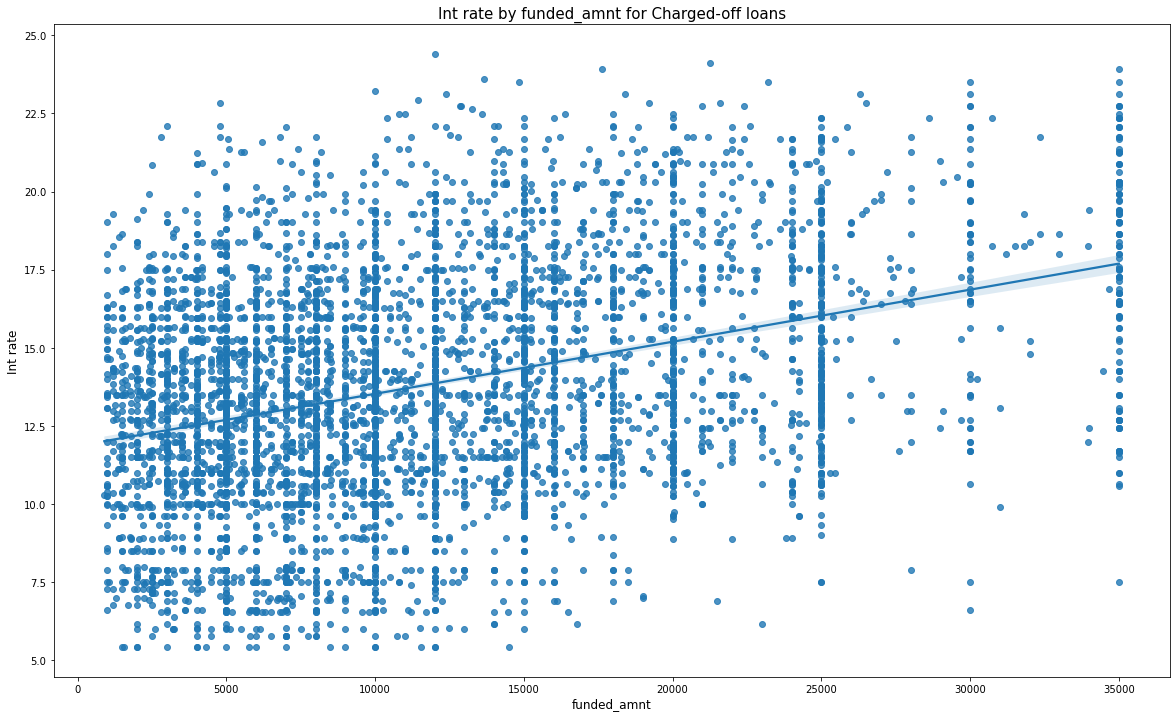

In [61]:
# Bi-variate analysis on interest rate and funded amount for Charged-off loans
fig, ax = plt.subplots(figsize=(20,12))
g2 = sns.regplot(x="funded_amnt", y="int_rate",data=data_CF[(data_CF.loan_status=="Charged Off")])
g2.set_title("Int rate by funded_amnt for Charged-off loans", fontsize=15)
g2.set_ylabel("Int rate", fontsize=12)
g2.set_xlabel("funded_amnt", fontsize=12)
plt.show()

Positive correlation between funded amount and interest rate

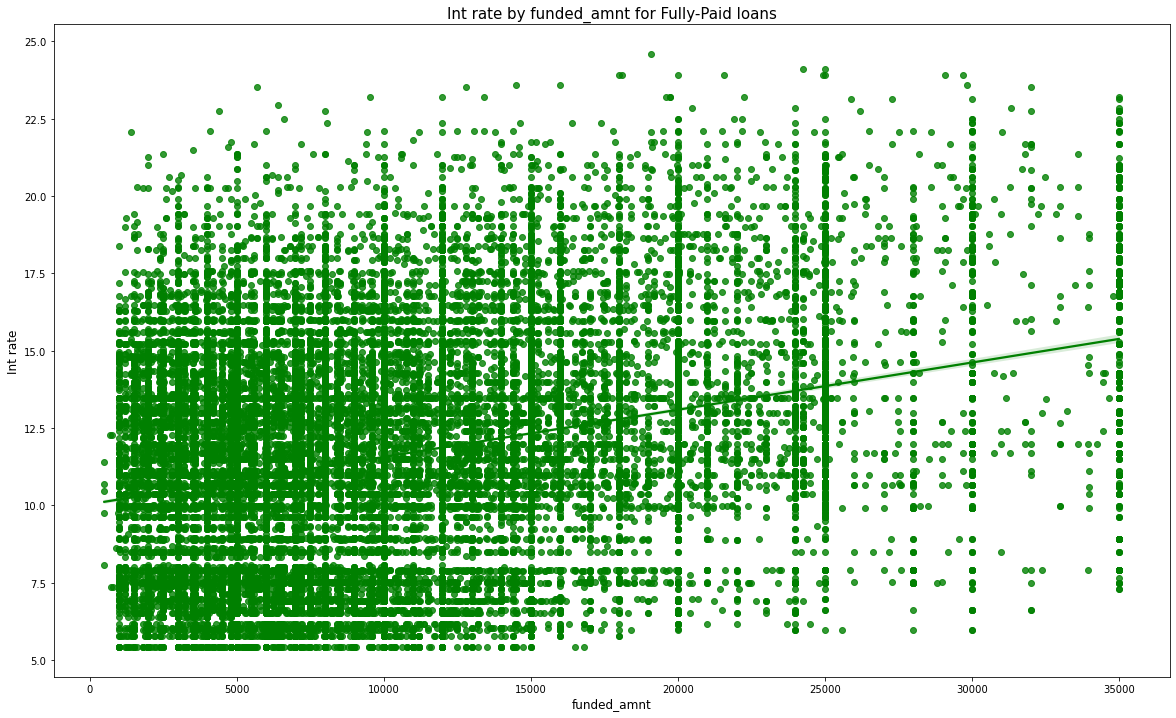

In [62]:
# Bi-variate analysis on interest rate and funded amount for Fully-paid loans
fig, ax = plt.subplots(figsize=(20,12))
g2 = sns.regplot(x="funded_amnt", y="int_rate",data=data_CF[(data_CF.loan_status=="Fully Paid")], color="green")
g2.set_title("Int rate by funded_amnt for Fully-Paid loans", fontsize=15)
g2.set_ylabel("Int rate", fontsize=12)
g2.set_xlabel("funded_amnt", fontsize=12)
plt.show()

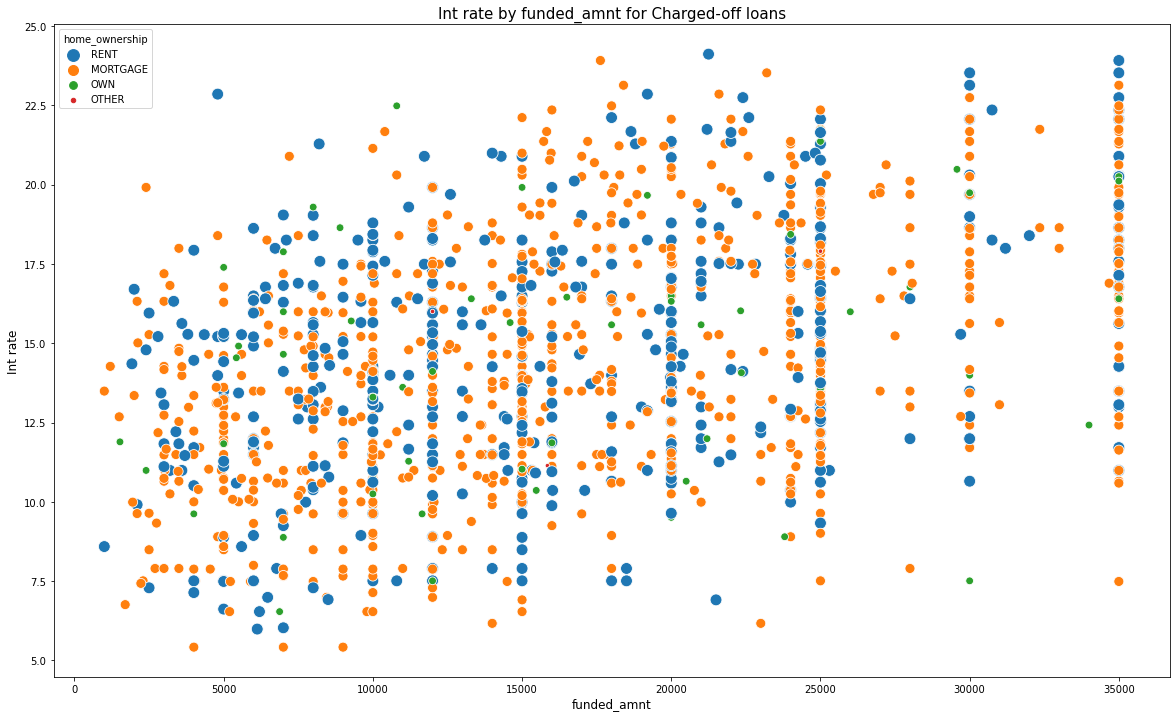

In [63]:
# Multi-variate analysis on Interest rate, funded amount and home ownership for Charged-off loans in high income bucket
fig, ax = plt.subplots(figsize=(20,12))
g2 = sns.scatterplot(x="funded_amnt", y="int_rate",data=data_CF[(data_CF.loan_status=="Charged Off") & (data_CF.annual_inc_bucket=="high")], 
                     hue="home_ownership",
                    size="home_ownership", sizes=(20,140), legend="full")
g2.set_title("Int rate by funded_amnt for Charged-off loans", fontsize=15)
g2.set_ylabel("Int rate", fontsize=12)
g2.set_xlabel("funded_amnt", fontsize=12)
plt.show()

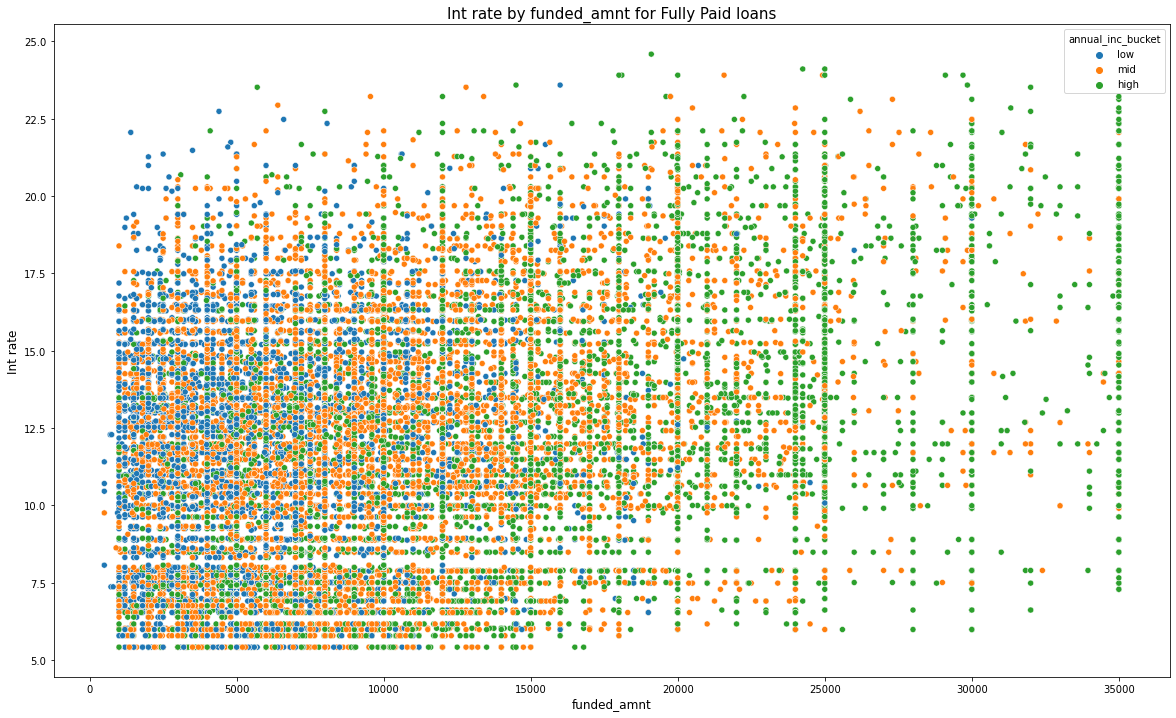

In [64]:
# Analysis of funded amount and interest rate against income bucket for fully paid loans
fig, ax = plt.subplots(figsize=(20,12))
g2 = sns.scatterplot(x="funded_amnt", y="int_rate",data=data_CF[(data_CF.loan_status=="Fully Paid")], hue="annual_inc_bucket")
g2.set_title("Int rate by funded_amnt for Fully Paid loans", fontsize=15)
g2.set_ylabel("Int rate", fontsize=12)
g2.set_xlabel("funded_amnt", fontsize=12)
plt.show()

For same loan amount and same income bucket there is wide variation in interest rate. What factors are driving this??

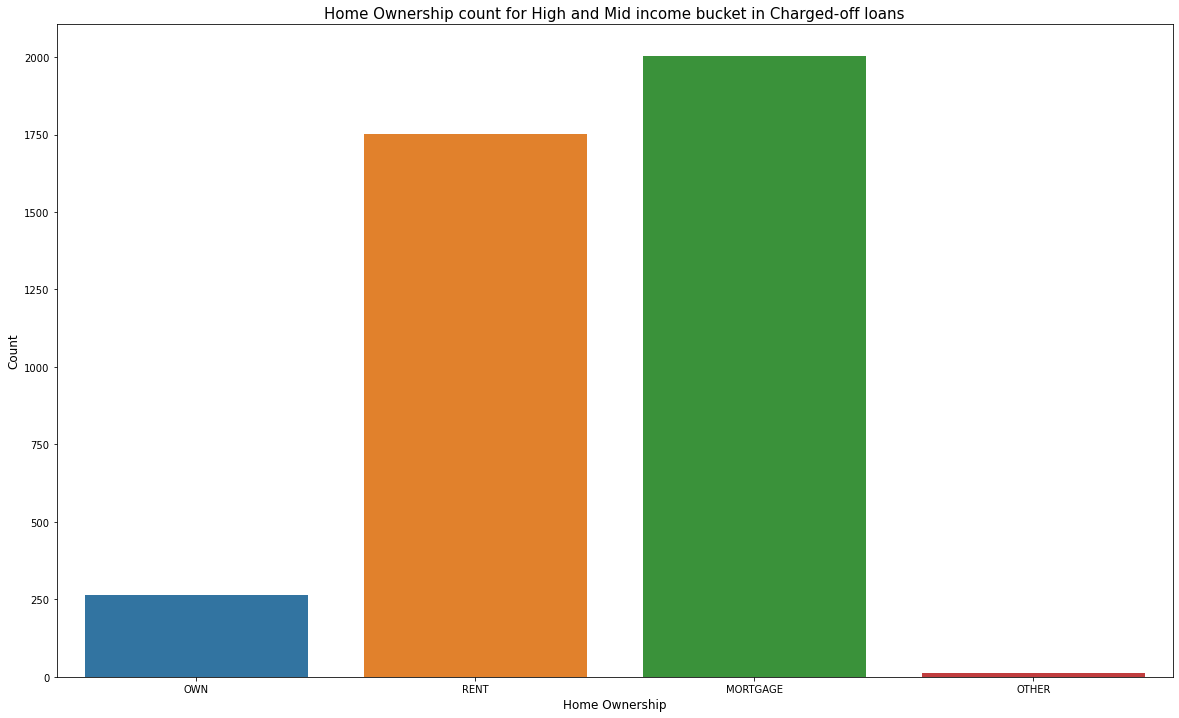

In [65]:
# Uni-variate analysis on home ownership for charged-off loans in high and mid income bucket
fig, ax = plt.subplots(figsize=(20,12))
g2 = sns.countplot(x="home_ownership", 
                   data=data_CF[(data_CF.loan_status=="Charged Off") & (data_CF.annual_inc_bucket.isin(["high","mid"]))])
g2.set_title("Home Ownership count for High and Mid income bucket in Charged-off loans", fontsize=15)
g2.set_ylabel("Count", fontsize=12)
g2.set_xlabel("Home Ownership", fontsize=12)
plt.show()

# Majority of defaulted customers in high and mid income buckets had either mortgaged or rented home

# Analysis on Conditions

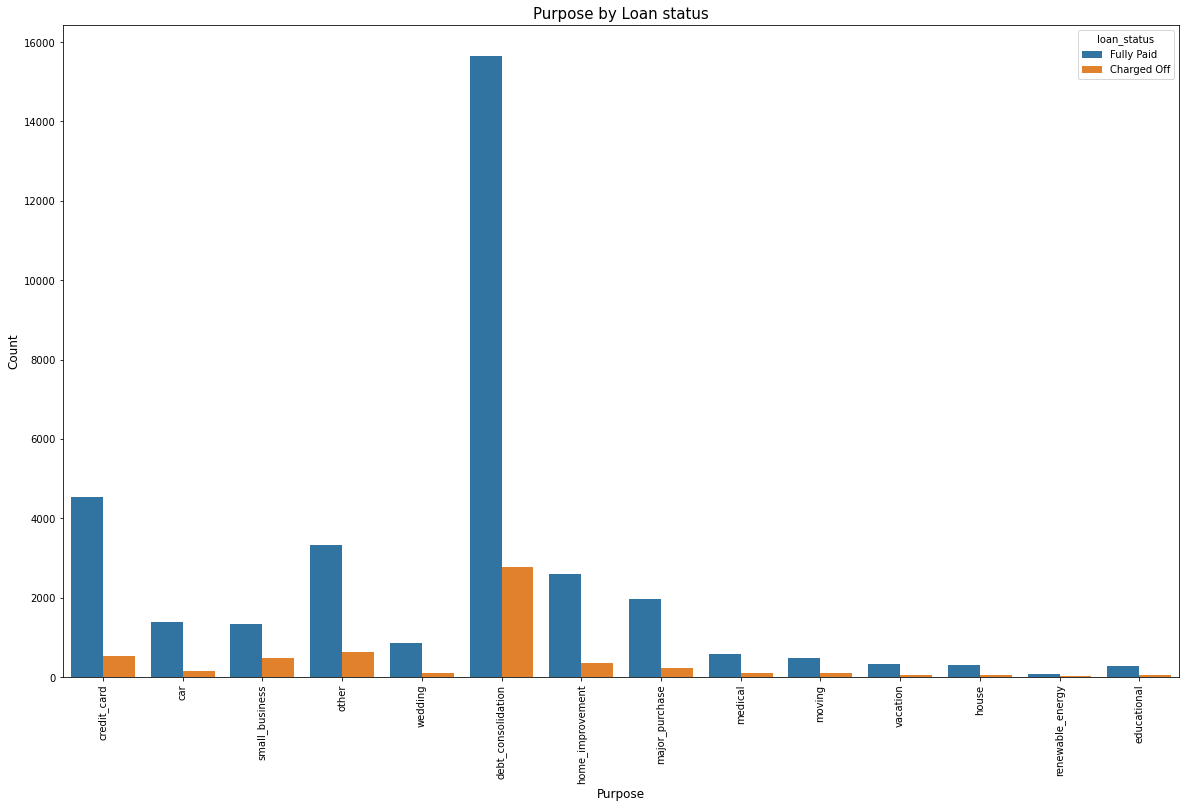

In [66]:
# Checking Poupose, bi-variate analysis on purpose across loan status
fig, ax = plt.subplots(figsize=(20,12))
g2 = sns.countplot(x="purpose",  data=data_CF, hue="loan_status")
g2.set_title("Purpose by Loan status", fontsize=15)
g2.set_ylabel("Count", fontsize=12)
g2.set_xlabel("Purpose", fontsize=12)
plt.xticks(rotation=90)
plt.show()

# Observation - Most frequent category of purpose is debt consolidation across Charged-off and Fully-paid loans

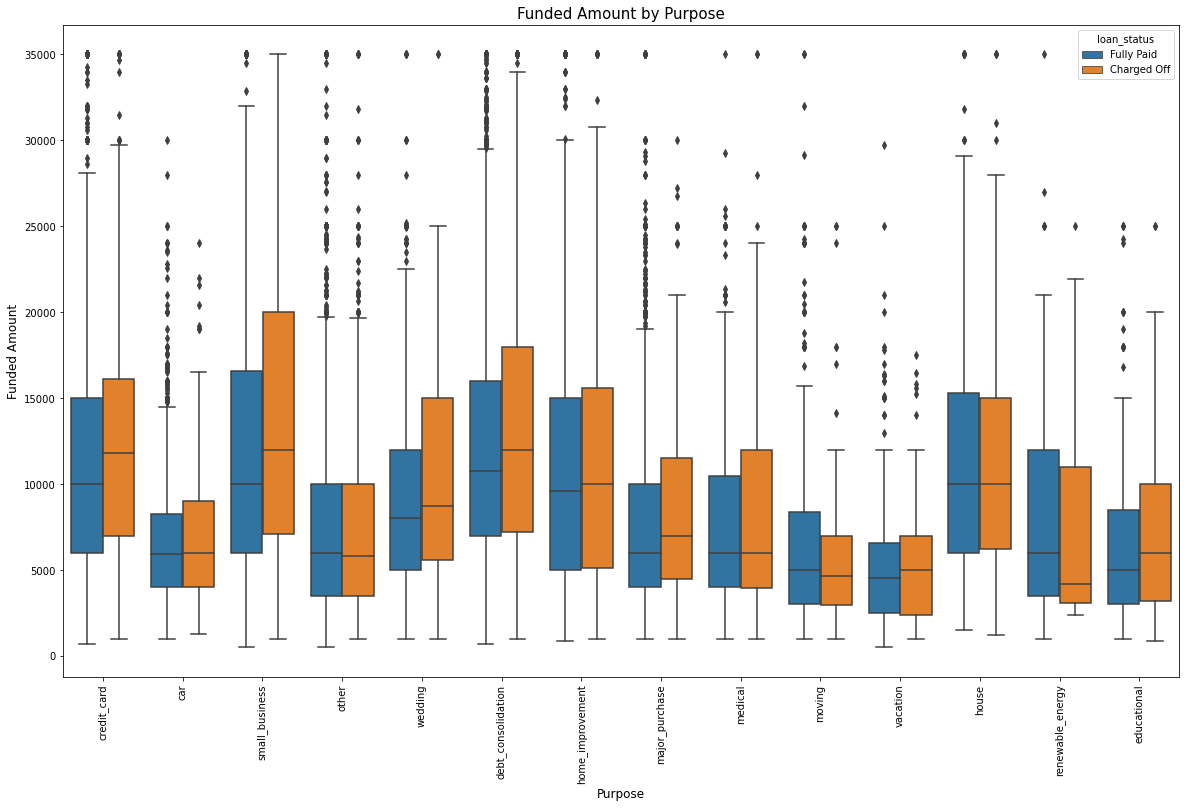

In [67]:
# Box plot analysis on funded amount against purpose to check distribution of funded amount across different categories of purpose
fig, ax = plt.subplots(figsize=(20,12))
plt.ticklabel_format(style='plain')
g2 = sns.boxplot(y="funded_amnt", x="purpose",data=data_CF, hue="loan_status")
g2.set_title("Funded Amount by Purpose", fontsize=15)
g2.set_ylabel("Funded Amount", fontsize=12)
g2.set_xlabel("Purpose", fontsize=12)
plt.xticks(rotation=90)
plt.show()

Small business loans have the highest variation in loan amount, followed by debt consolidation, Home improvement and credit card

In [68]:
# checking revolving balance
data.revol_bal.describe()

count     39717.000000
mean      13382.528086
std       15885.016641
min           0.000000
25%        3703.000000
50%        8850.000000
75%       17058.000000
max      149588.000000
Name: revol_bal, dtype: float64

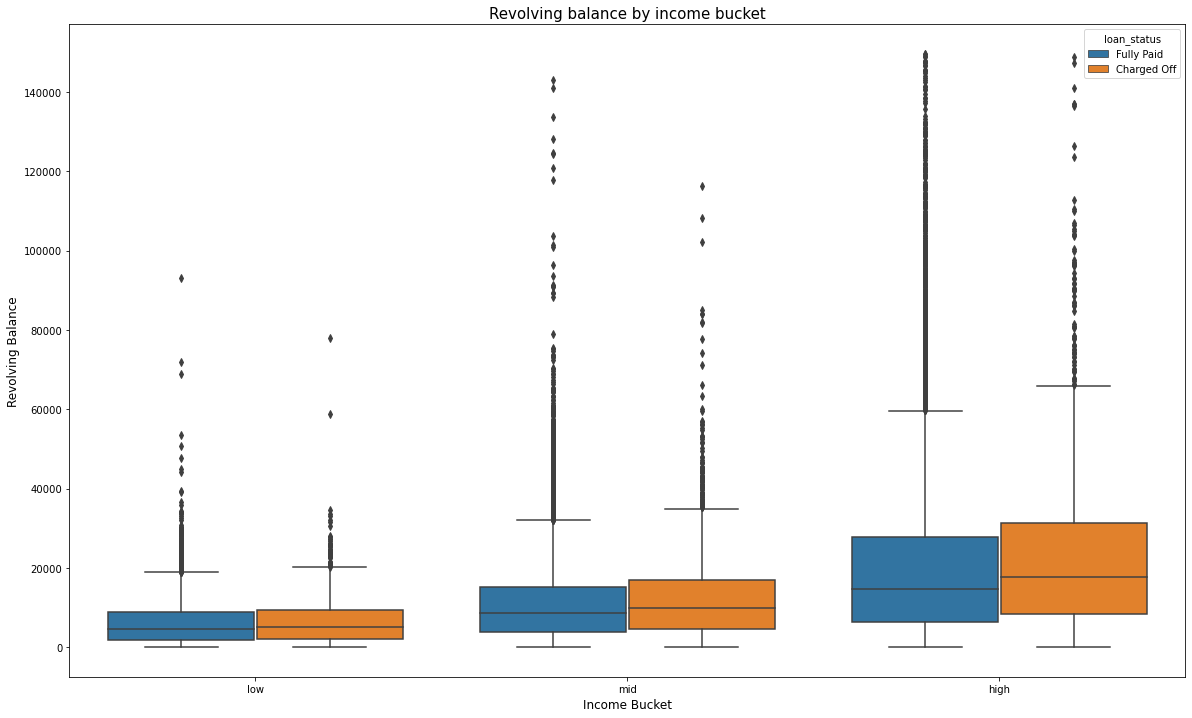

In [69]:
# Checking distribution of revolving balance against income buckets across loan status
fig, ax = plt.subplots(figsize=(20,12))
plt.ticklabel_format(style='plain')
g2 = sns.boxplot(y="revol_bal", x="annual_inc_bucket",data=data_CF, hue="loan_status")
g2.set_title("Revolving balance by income bucket", fontsize=15)
g2.set_ylabel("Revolving Balance", fontsize=12)
g2.set_xlabel("Income Bucket", fontsize=12)
plt.show()

Defaulters in high income bucket had the highest median revolving income

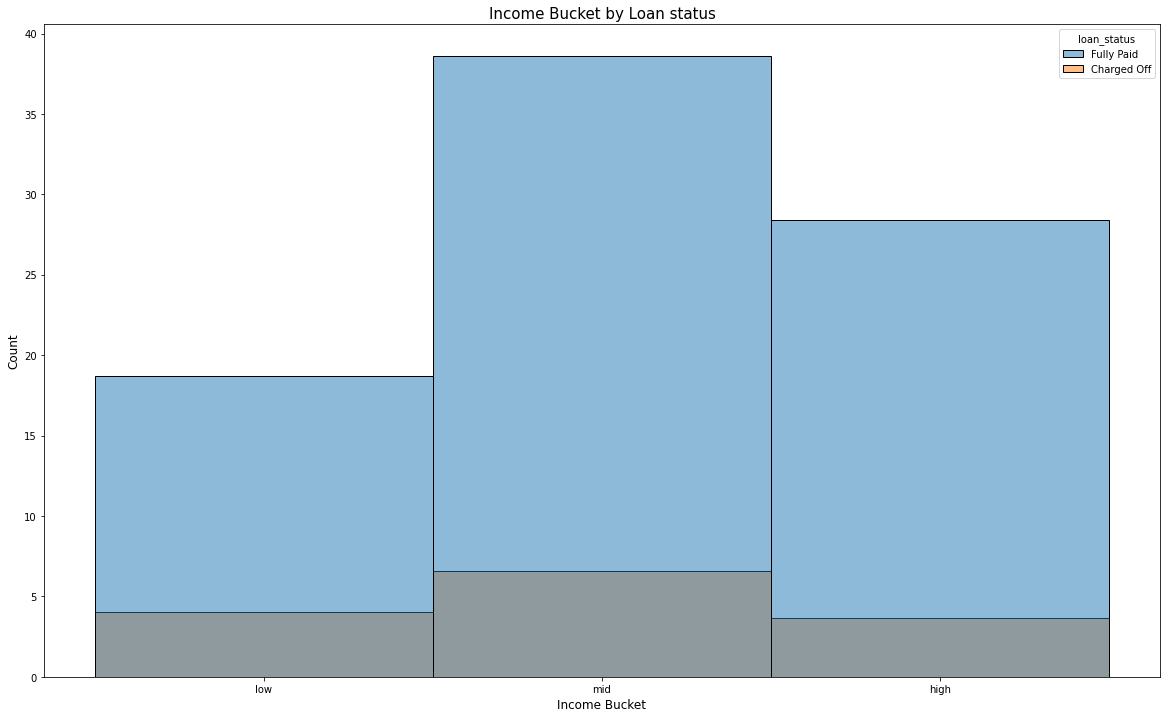

In [70]:
# Checking frequency of iomcome buckets across loan status
fig, ax = plt.subplots(figsize=(20,12))
g2 = sns.histplot(x="annual_inc_bucket",  data=data_CF, hue="loan_status", stat="percent")
g2.set_title("Income Bucket by Loan status", fontsize=15)
g2.set_ylabel("Count", fontsize=12)
g2.set_xlabel("Income Bucket", fontsize=12)
plt.show()

# Observation - 46% of defaulters were from Mid income bucket

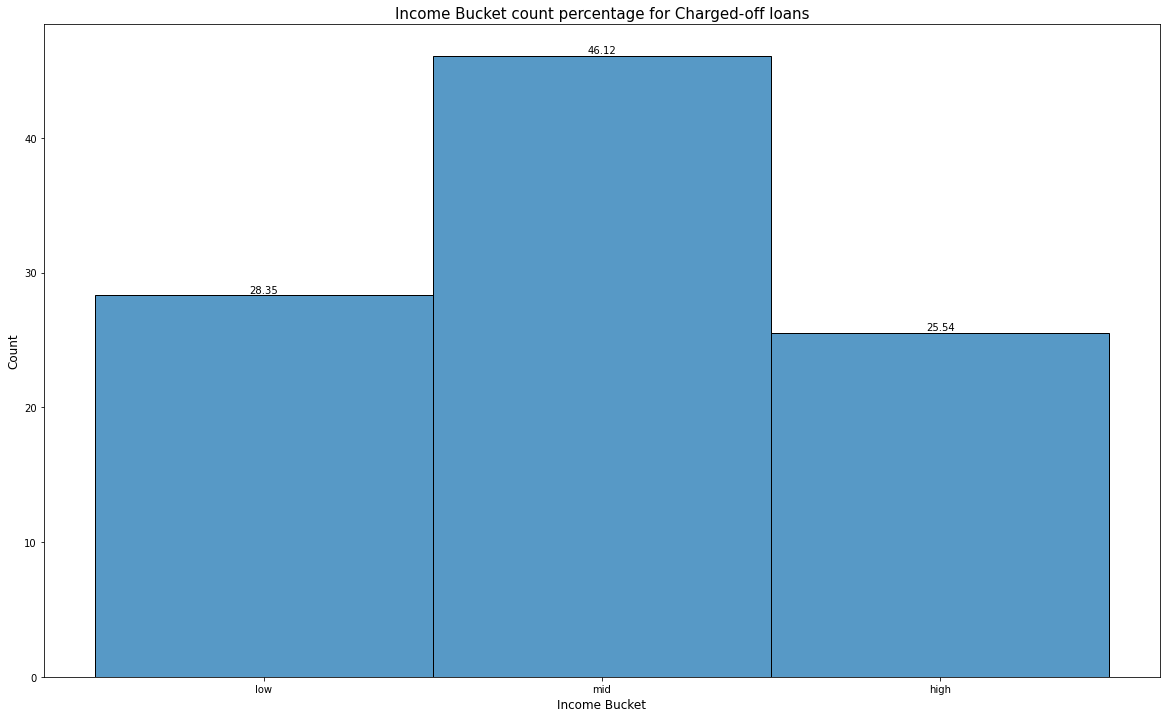

In [71]:
# Percentage frequency of income buckets for charged-off loans
fig, ax = plt.subplots(figsize=(20,12))
g2 = sns.histplot(x="annual_inc_bucket",  data=data_CF[(data_CF.loan_status=="Charged Off")], stat="percent")
labels = [str(round(v, 2)) if v else '' for v in g2.containers[0].datavalues]
g2.bar_label(g2.containers[0], labels=labels)
g2.set_title("Income Bucket count percentage for Charged-off loans", fontsize=15)
g2.set_ylabel("Count", fontsize=12)
g2.set_xlabel("Income Bucket", fontsize=12)
plt.show()

In [72]:
data_CF.term.value_counts()

36    29096
60    10242
Name: term, dtype: int64

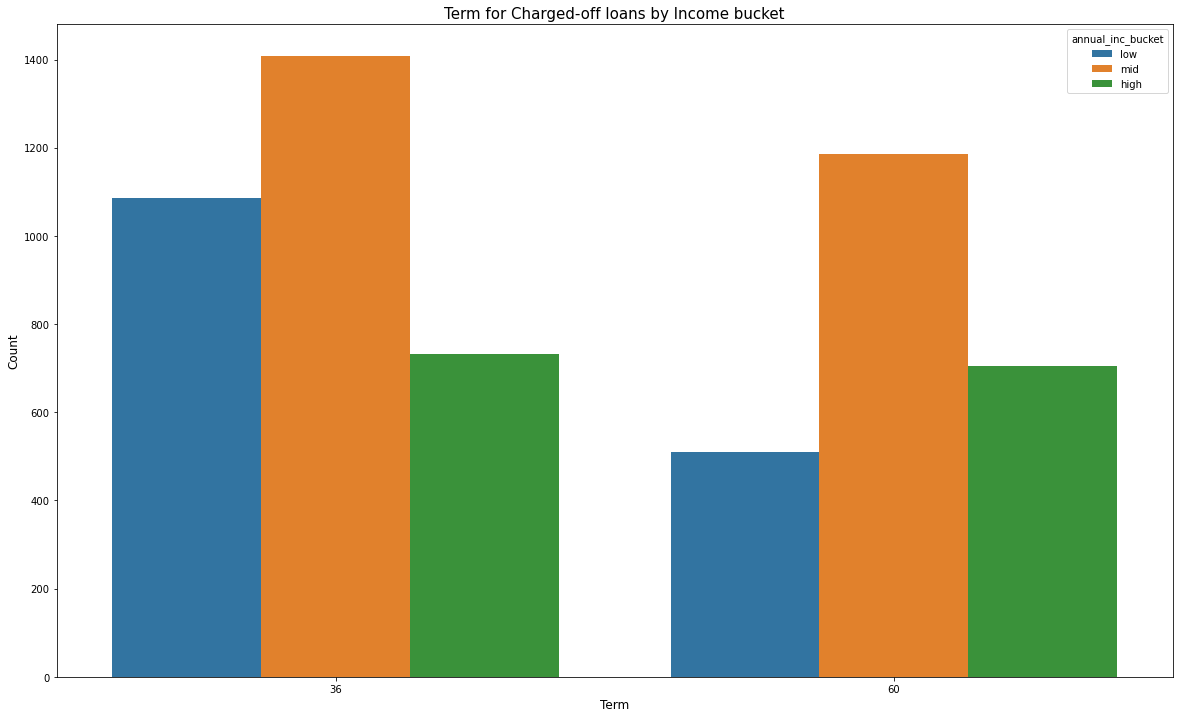

In [73]:
# Checking frequency of term against income bucket for charged-off loans
fig, ax = plt.subplots(figsize=(20,12))
g2 = sns.countplot(x="term",  data=data_CF[(data_CF.loan_status=="Charged Off")], hue="annual_inc_bucket", 
                   dodge=True)
g2.set_title("Term for Charged-off loans by Income bucket", fontsize=15)
g2.set_ylabel("Count", fontsize=12)
g2.set_xlabel("Term", fontsize=12)
plt.show()

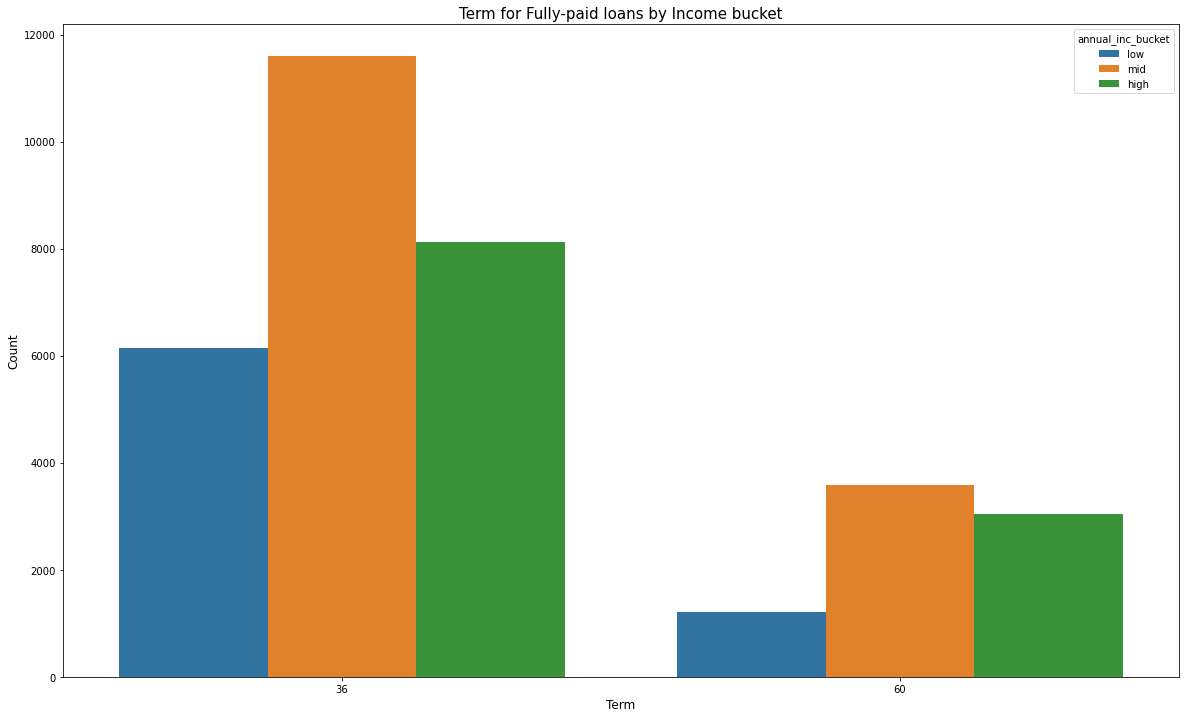

In [74]:
# Checking frequency of term against income bucket for Fully-paid loans
fig, ax = plt.subplots(figsize=(20,12))
g2 = sns.countplot(x="term",  data=data_CF[(data_CF.loan_status=="Fully Paid")], hue="annual_inc_bucket", 
                   dodge=True)
g2.set_title("Term for Fully-paid loans by Income bucket", fontsize=15)
g2.set_ylabel("Count", fontsize=12)
g2.set_xlabel("Term", fontsize=12)
plt.show()

# Observation - Charged-off loans in low and mid income buckets have more customers with 36 months of term

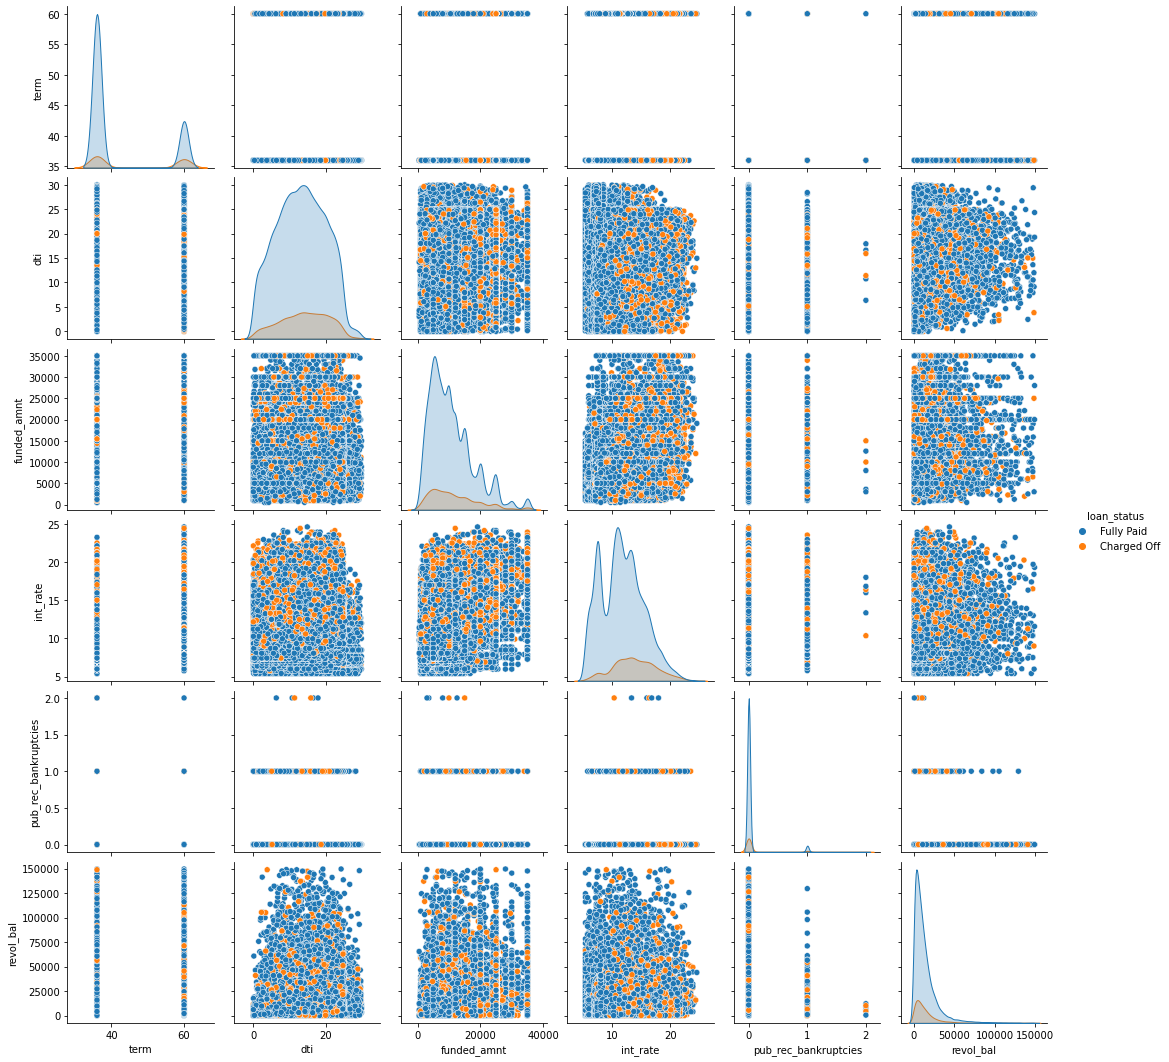

In [75]:
# Pairplot analsysis on multiple columns
sns.pairplot(
    data=data_CF[["home_ownership", "purpose", "term", "dti", "funded_amnt", "int_rate", "pub_rec_bankruptcies", 
                  "annual_inc_bucket", "loan_status", "verification_status", "emp_length", "revol_bal"]],
    hue="loan_status"
)
plt.show()

Relation between Funded amount and Interest rate across Income buckets and Term lengths


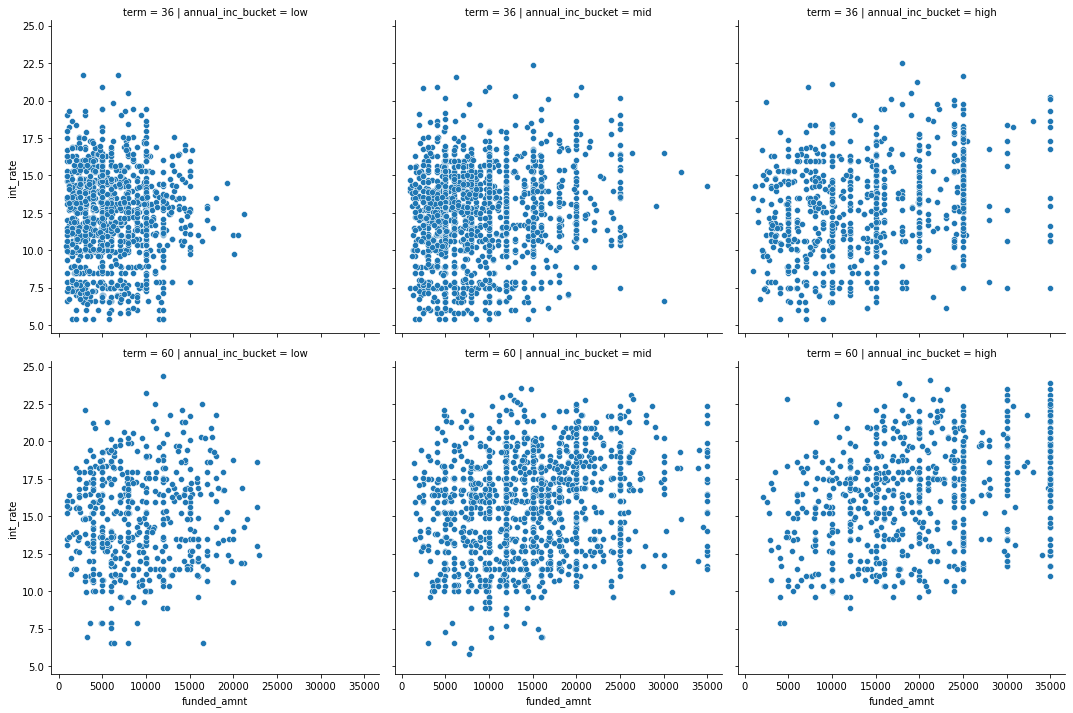

In [76]:
# relplot analysis on multiple columns for Charged-off loans
print("Relation between Funded amount and Interest rate across Income buckets and Term lengths")
g2 = sns.relplot(data=data_CF[(data_CF.loan_status=="Charged Off")], x="funded_amnt", y="int_rate", col="annual_inc_bucket", row="term")
plt.show()

# Observation - Interest rate tend to be on the higher side for 60 months of term length in mid and high income group for Charged-off loans, but not for 36 months term, although majority defaulted customers have 36 months term